# Book Analysis and Content Based Recommendation System

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 300)
import seaborn as sns
import matplotlib as plt

### Loading data and displaying basic data information

In [2]:
data = pd.read_csv('books_df.csv')

In [3]:
data

,id,book_title,book_author,book_publisher,book_publishDate,book_description,book_totalPages,book_category,book_thumbnail,book_image,book_language,book_preview,book_info,book_subtitle,book_averageRating,book_ratingCount
0,UjG8qXVRSSQC,Google Power Search,Stephan Spencer,"O'Reilly Media, Inc.",7/23/11,"Behind Google's deceptively simple interface is immense power for both market and competitive research—if you know how to use it well. Sure, basic searches are easy, but complex searches require specialized skills. This concise book takes you through the full range of Google's powerful search-re...",73.0,Computers,http://books.google.com/books/content?id=UjG8qXVRSSQC&printsec=frontcover&img=1&zoom=5&edge=curl&source=gbs_api,http://books.google.com/books/content?id=UjG8qXVRSSQC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api,en,http://books.google.com/books?id=UjG8qXVRSSQC&printsec=frontcover&dq=search+terms&hl=&cd=1&source=gbs_api,http://books.google.com/books?id=UjG8qXVRSSQC&dq=search+terms&hl=&source=gbs_api,NaN,NaN,0
1,gqDf__ULmR8C,Flexible Query Answering Systems,"Troels Andreasen, Ronald R. Yager, Henrik Bulskov, Henning Christiansen, Henrik Legind Larsen",Springer Science & Business Media,10/15/09,"This volume constitutes the Proceedings of the 8th International Conference on Flexible Query Answering Systems, FQAS 2009, held in Roskilde, Denmark, October 26–28, 2009. FQAS 2009 was preceded by the 1994, 1996 and 1998 editions held in Roskilde, Denmark, the FQAS 2000 held in Warsaw, Poland, ...",688.0,Computers,http://books.google.com/books/content?id=gqDf__ULmR8C&printsec=frontcover&img=1&zoom=5&edge=curl&source=gbs_api,http://books.google.com/books/content?id=gqDf__ULmR8C&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api,en,http://books.google.com/books?id=gqDf__ULmR8C&pg=PA180&dq=search+terms&hl=&cd=2&source=gbs_api,http://books.google.com/books?id=gqDf__ULmR8C&dq=search+terms&hl=&source=gbs_api,"8th International Conference, FQAS 2009, Roskilde, Denmark, October 26-28, 2009, Proceedings",NaN,0
2,pscmDwAAQBAJ,Key Terms and Concepts for Investigation,John J. Fay,Routledge,5/25/17,"Key Terms and Concepts for Investigation provides students and practitioners with a compilation of concise, accurate articles on major topics pertaining to criminal, private, and military investigations. Each entry in this reference features a definition and then describes its function in invest...",400.0,Social Science,http://books.google.com/books/content?id=pscmDwAAQBAJ&printsec=frontcover&img=1&zoom=5&edge=curl&source=gbs_api,http://books.google.com/books/content?id=pscmDwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api,en,http://books.google.com/books?id=pscmDwAAQBAJ&pg=PT120&dq=search+terms&hl=&cd=3&source=gbs_api,https://play.google.com/store/books/details?id=pscmDwAAQBAJ&source=gbs_api,"A Reference for Criminal, Private, and Military Investigators",NaN,0
3,ZAH1AwAAQBAJ,Power Query for Power BI and Excel,"Christopher Webb, Crossjoin Consulting Limited",Apress,7/5/14,"Power Query for Power BI and Excel is a book for people who are tired of copying and pasting data into Excel worksheets. Power Query, part of the Microsoft Power BI suite, is a tool that automates the process of getting data into Excel and will save you hours of dull, repetitive, and error-prone...",261.0,Computers,http://books.google.com/books/content?id=ZAH1AwAAQBAJ&printsec=frontcover&img=1&zoom=5&edge=curl&source=gbs_api,http://books.google.com/books/content?id=ZAH1AwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api,en,http://books.google.com/books?id=ZAH1AwAAQBAJ&pg=PA42&dq=search+terms&hl=&cd=4&source=gbs_api,http://books.google.com/books?id=ZAH1AwAAQBAJ&dq=search+terms&hl=&source=gbs_api,NaN,NaN,0
4,g7YNeVDDbVgC,Flexible Query Answering Systems,"Henrik Legind Larsen, Gabriella Pasi, Daniel Ortiz-Arroyo, Troels Andreasen, Henning Christiansen",Springer Science & Business Media,5/30/06,"This book constitutes the refereed proc

In [4]:
data.info

<bound method DataFrame.info of                id                                           book_title  \
0    UjG8qXVRSSQC                                  Google Power Search   
1    gqDf__ULmR8C                     Flexible Query Answering Systems   
2    pscmDwAAQBAJ             Key Terms and Concepts for Investigation   
3    ZAH1AwAAQBAJ                   Power Query for Power BI and Excel   
4    g7YNeVDDbVgC                     Flexible Query Answering Systems   
..            ...                                                  ...   
958  aSJMMwAACAAJ                                Shanghai's Schemozzle   
959  TfvOywEACAAJ                  Brain Games Rock N Roll Word Search   
960  3rRIUQXXyYMC                        All Creatures Great and Small   
961  b_AzzwEACAAJ                               Who's who in the Bible   
962  PuoVzgEACAAJ  Word Search Puzzle Book for Gardeners (Large Print)   

                                                                               

In [5]:
data.shape

(963, 16)

In [6]:
print(data.duplicated().sum())

0


## Data Visualization

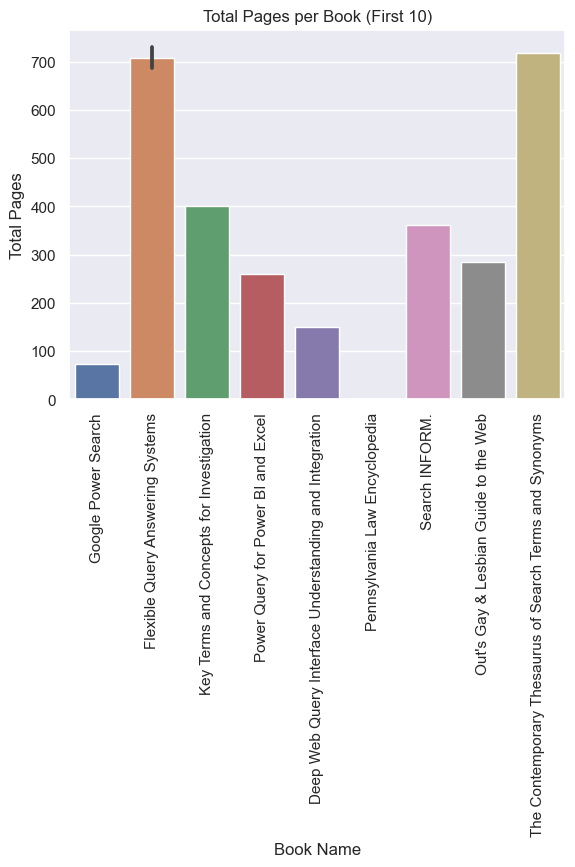

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_books = data.iloc[:10]  
sns.set(font_scale=1) 

sns.barplot(x='book_title', y='book_totalPages', data=subset_books)
plt.xticks(rotation=90)
plt.xlabel('Book Name')
plt.ylabel('Total Pages')
plt.title('Total Pages per Book (First 10)')
plt.show()





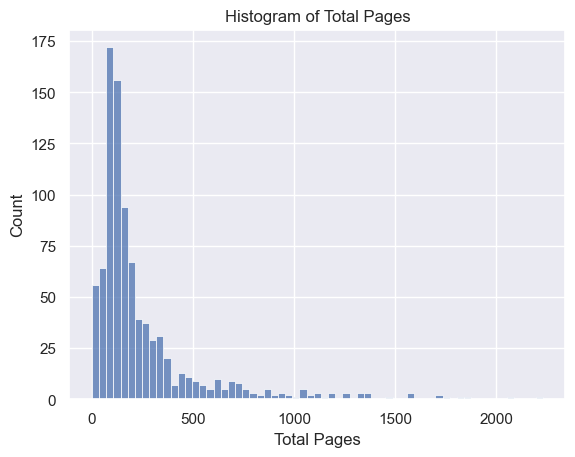

In [8]:
sns.histplot(data=data['book_totalPages'])
sns.set(font_scale=1) 
plt.xlabel('Total Pages')
plt.ylabel('Count')
plt.title('Histogram of Total Pages')
plt.show()



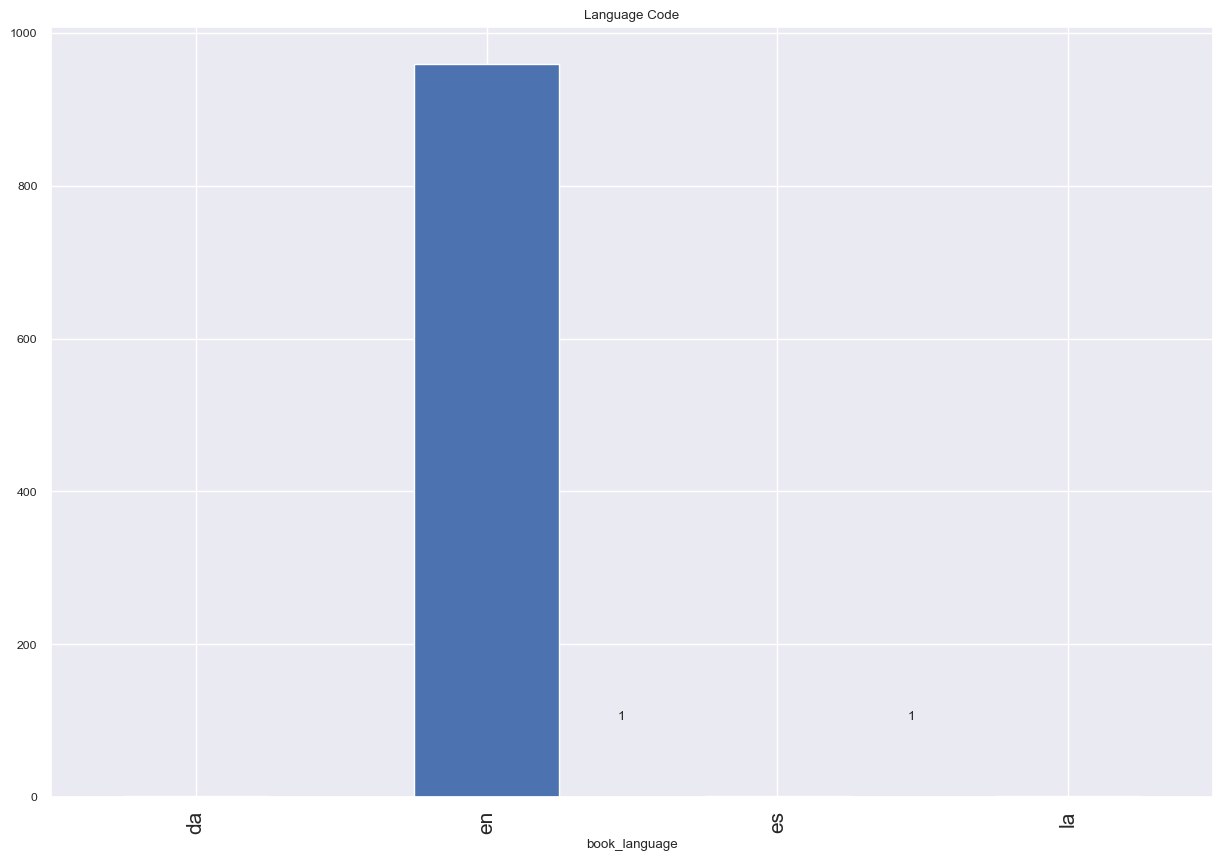

In [9]:
sns.set_context('paper')
sns.set(font_scale=0.8)
plt.figure(figsize=(15,10))
ax = data.groupby('book_language')['book_title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

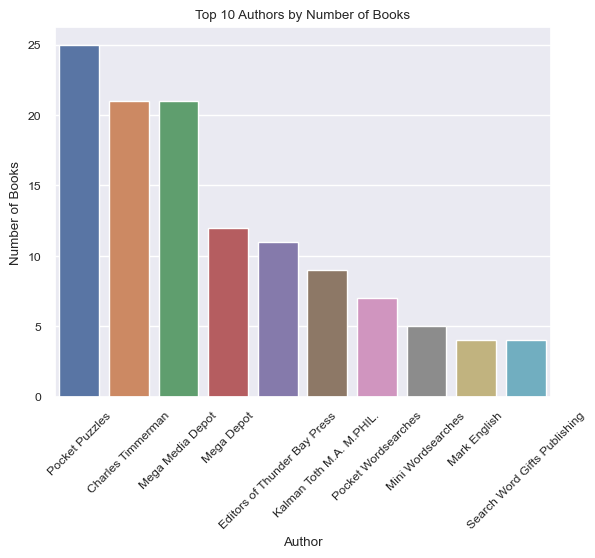

In [10]:
top_authors = data['book_author'].value_counts().nlargest(10)
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.xticks(rotation=45)
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Top 10 Authors by Number of Books')
plt.show()


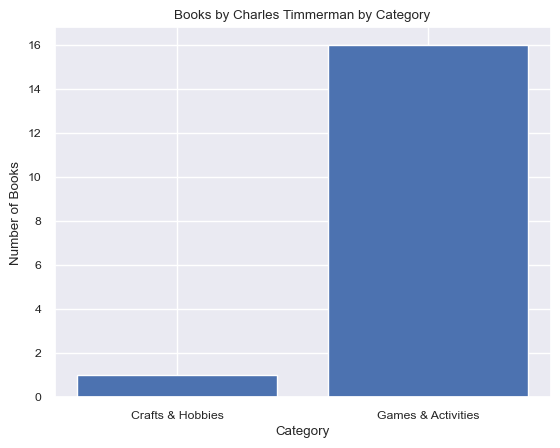

In [11]:
author_name = "Charles Timmerman"
author_df = data[data["book_author"] == author_name]
category_counts = author_df.groupby("book_category")["book_title"].count()


plt.bar(category_counts.index, category_counts.values)
plt.title(f"Books by {author_name} by Category")
plt.xlabel("Category")
plt.ylabel("Number of Books")
plt.show()



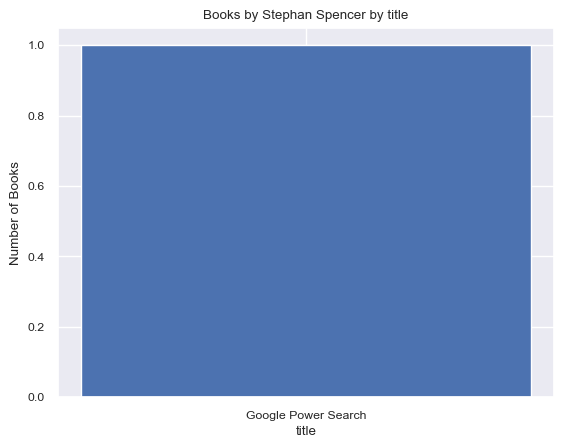

In [12]:
author_name = "Stephan Spencer"

# Filter the dataset to include only books by the author
author_df = data[data["book_author"] == author_name]

# Group the books by category and count the number of books in each category
category_counts = author_df.groupby("book_title")["book_title"].count()

# Create a bar chart of the category counts
plt.bar(category_counts.index, category_counts.values)
plt.title(f"Books by {author_name} by title")
plt.xlabel("title")
plt.ylabel("Number of Books")
plt.show()

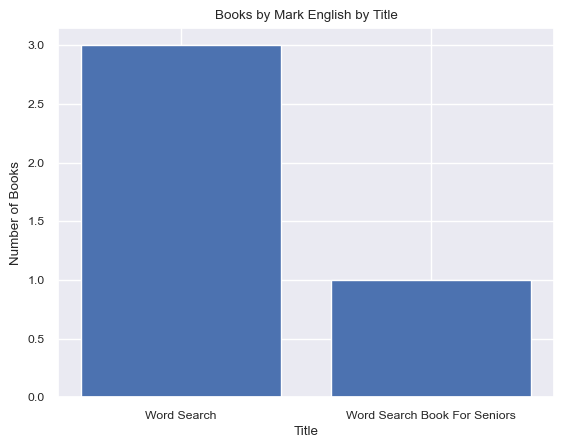

In [13]:

author_name = "Mark English"

# Filter the dataset to include only books by the author
author_df = data[data["book_author"] == author_name]

# Group the books by category and count the number of books in each category
category_counts = author_df.groupby("book_title")["book_title"].count()

# Create a bar chart of the category counts
plt.bar(category_counts.index, category_counts.values)
plt.title(f"Books by {author_name} by Title")
plt.xlabel("Title")
plt.ylabel("Number of Books")
plt.show()

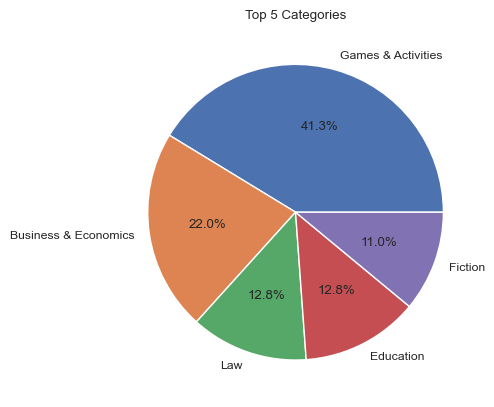

In [14]:
category_counts = data.groupby("book_category").size()

top_categories = category_counts.sort_values(ascending=False).head(6)


top_categories = top_categories[1:]


plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%')
plt.title("Top 5 Categories")
plt.show()



## Displaying books by categories

## Category - Computers

In [24]:
import requests
from IPython.display import HTML


category = "Computers"


category_df = data[data["book_category"] == category]

for index, row in category_df.iterrows():
    image_url = row["book_thumbnail"]
    response = requests.get(image_url)
    image = response.content
    title = row["book_title"]
    display(HTML(f'<h3>{title}</h3><img src="{image_url}">'))

## Category - Law

In [25]:
import requests
from IPython.display import HTML


category = "Law"


category_df = data[data["book_category"] == category]

for index, row in category_df.iterrows():
    image_url = row["book_thumbnail"]
    response = requests.get(image_url)
    image = response.content
    title = row["book_title"]
    display(HTML(f'<h3>{title}</h3><img src="{image_url}">'))


###   Displaying the details where author has published in same publication more than 3 times

In [26]:

same_author_publisher_count = data.groupby(['book_author', 'book_publisher']).size().reset_index(name='count')
same_author_publisher_count = same_author_publisher_count[same_author_publisher_count['count'] > 3]


same_author_publisher_count


same_author_publisher_count = same_author_publisher_count.drop(same_author_publisher_count[same_author_publisher_count['book_author'] == 0].index)
same_author_publisher_count = same_author_publisher_count.drop(same_author_publisher_count[same_author_publisher_count['book_publisher'] == 0].index)


same_author_publisher_count



,book_author,book_publisher,count
32,Charles Timmerman,Everything,8
33,Charles Timmerman,Simon and Schuster,9
58,Editors of Thunder Bay Press,Thunder Bay Press,10
120,Kalman Toth M.A. M.PHIL.,Createspace Independent Publishing Platform,8
157,Mega Depot,Createspace Independent Publishing Platform,12
158,Mega Media Depot,Createspace Independent Publishing Platform,19


### Displaying the details where author has published a book in same category more than 3 times

In [27]:
same_author_category_count = data.groupby(['book_author', 'book_category']).size().reset_index(name='count')

same_author_category_count = same_author_category_count[same_author_category_count['count'] > 3]


same_author_category_count


same_author_category_count = same_author_category_count.drop(same_author_category_count[same_author_category_count['book_author'] == 0].index)
same_author_category_count = same_author_category_count.drop(same_author_category_count[same_author_category_count['book_category'] == 0].index)

same_author_category_count



,book_author,book_category,count
41,Charles Timmerman,Games & Activities,16
72,Editors of Thunder Bay Press,Games & Activities,8


# Content Based Recommendation system

## Pre-processing data

In [28]:
df = data.dropna(subset=['book_author', 'book_description'])
df = data.drop_duplicates(subset=['book_title'])
df = data[['book_title', 'book_author', 'book_description', 'book_thumbnail', 'book_preview', 'book_category']]
df = df.fillna('Description not available')




## Using scikit-learn's CountVectorizer to convert the book descriptions into a matrix of token counts

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(df['book_description'])

## Calculating the cosine similarity between the book descriptions using scikit-learn's cosine_similarity

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X)


## function that takes a book title as input and returns a list of top 5 recommended books based on the cosine similarity between their descriptions:

In [41]:
import matplotlib.pyplot as plt
def get_recommendations(title):
    
    idx = df[df['book_title'] == title].index[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

   
    top_books = sim_scores[1:6]

    
    result_list = []

    
    for book_idx in [i[0] for i in top_books]:
        book_title = df.iloc[book_idx]['book_title']
        book_image_link = df.iloc[book_idx]['book_thumbnail']
       
       
        response = requests.get(book_image_link)
        book_image = Image.open(BytesIO(response.content))
        book_image_np = np.asarray(book_image)
        
     
        plt.imshow(book_image_np)
        plt.title(book_title)
        plt.axis('off')
        plt.show()
        
        
        recommended_book = [book_title, book_image_np]
        result_list.append(recommended_book)



## Recommendations for 'Google Power Search'

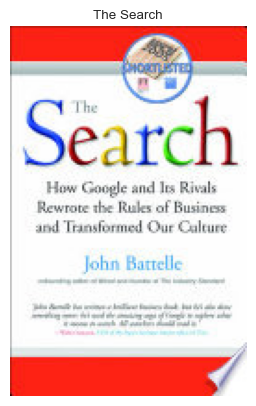

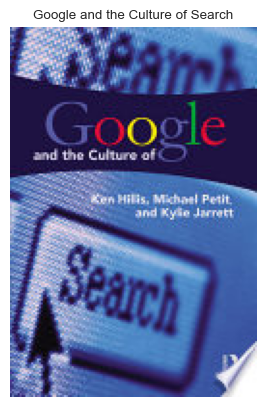

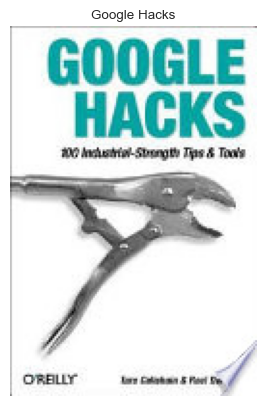

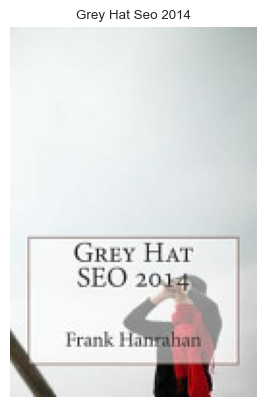

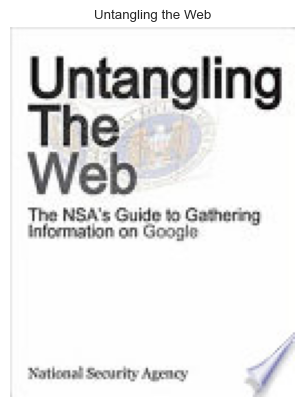

In [42]:
get_recommendations('Google Power Search')


## Recommendations for 'Power Query for Power BI and Excel'

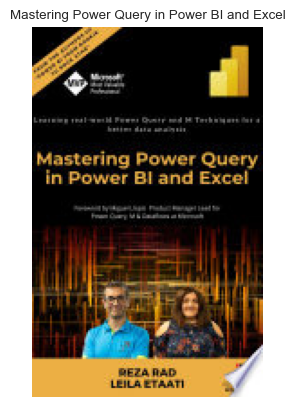

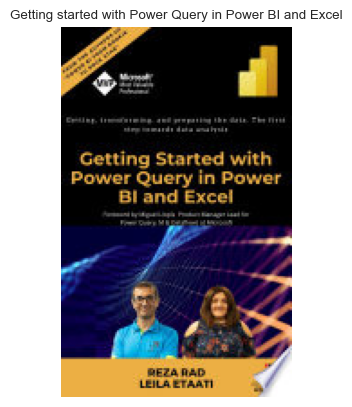

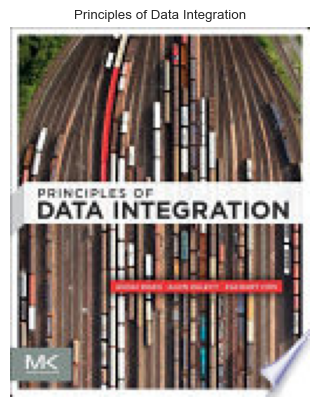

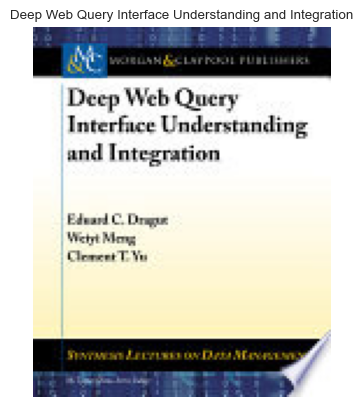

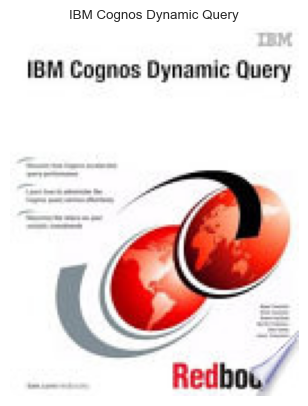

In [43]:
get_recommendations('Power Query for Power BI and Excel')

## Recommendation for 'Flexible Query Answering Systems'

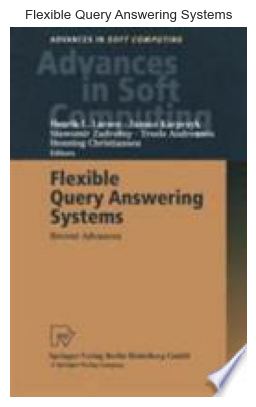

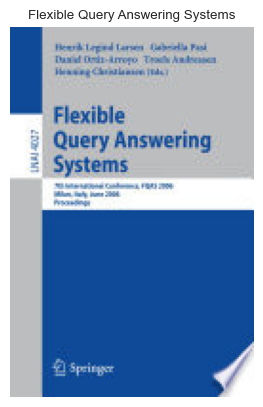

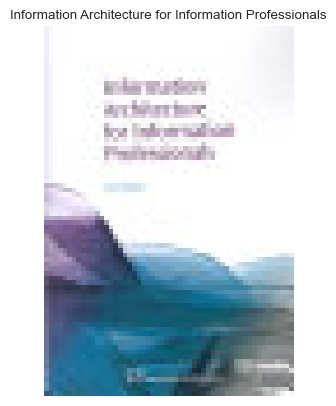

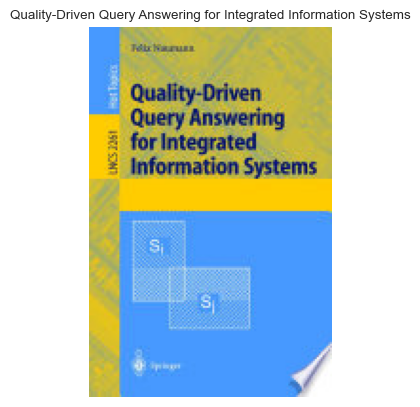

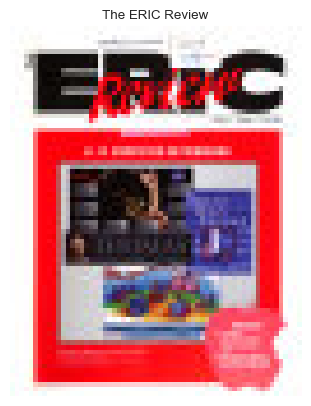

In [44]:
get_recommendations('Flexible Query Answering Systems')